## Librairies

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [27]:
df = pd.read_csv('dataset_wine.csv', index_col='Id')

In [28]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Analyse Exploratoire

In [29]:
# Le type de données de chaque colonne
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [30]:
# Le resumé statistique
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [31]:
# valeurs manquantes
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
# La fréquence d'apparition des scores dans la qualité
df["quality"].value_counts(normalize=True)

quality
5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: proportion, dtype: float64

In [33]:
# variable catégorielle les scores de la qualité de vin présente.
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

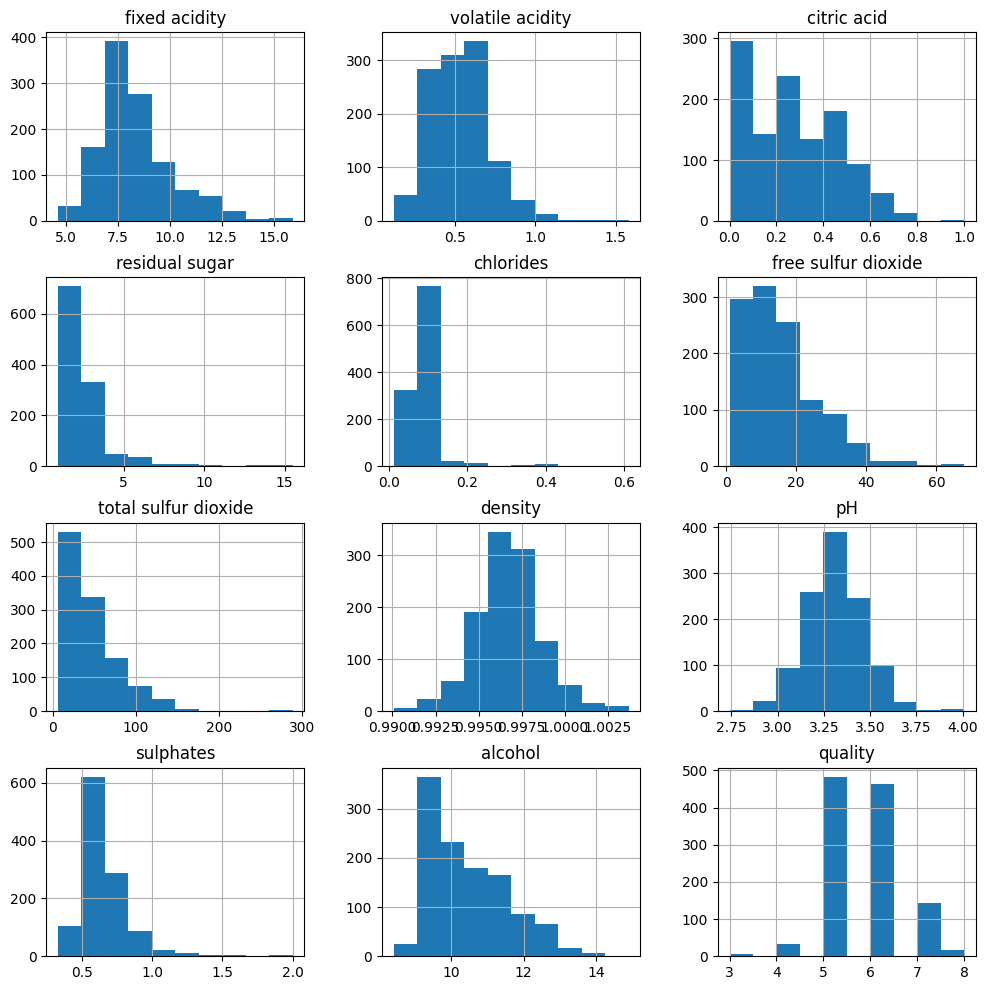

In [34]:
# Distribution des variables pour pouvoir normaliser, eventuellement
df.hist(figsize=(12, 12))

### Matrice de corrélation

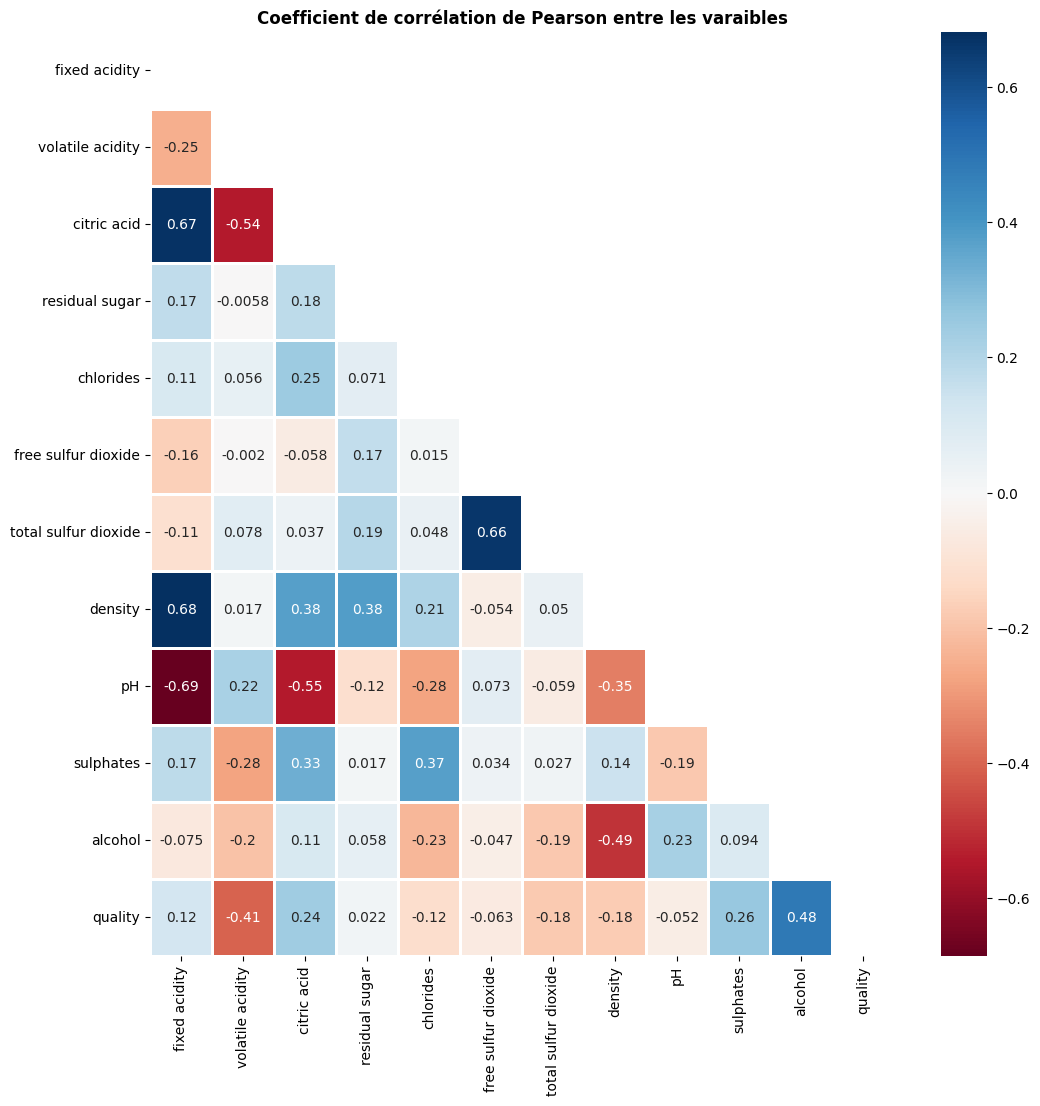

In [35]:
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True)

plt.title('Coefficient de corrélation de Pearson entre les varaibles', fontweight='bold')
plt.show()

## Modèle Machine Learning

In [36]:
# Libraries

## Subdiviser le dataset en train et test
from sklearn.model_selection import train_test_split

## Normaliser les données X
from sklearn.preprocessing import StandardScaler

## Modèle de ML
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

## Metrique
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


### Pré-processing 

In [37]:
X = df.drop("quality", axis=1)
y = df['quality']

# variable pour unifier le random 
seed = 7

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state= seed, test_size= 0.2
)

In [38]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
120,7.3,1.070,0.09,1.7,0.178,10.0,89.0,0.99620,3.30,0.57,9.0
286,12.0,0.450,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3
1406,8.2,0.240,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.9
1302,9.1,0.370,0.32,2.1,0.064,4.0,15.0,0.99576,3.30,0.80,11.2
694,9.0,0.470,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1296,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [39]:
X_train.shape

(914, 11)

In [40]:
X_test.shape

(229, 11)

In [41]:
y_train.shape

(914,)

In [42]:
y_test.shape

(229,)

In [43]:
# Standardiser pour rendre à la même échelle toutes les caractéristiques sans le output.

scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
X_train_scaled

array([[-0.5893232 ,  2.91571386, -0.89754083, ..., -0.0562461 ,
        -0.50708557, -1.34243747],
       [ 2.08595379, -0.47402371,  1.43574345, ..., -1.31781505,
         0.58493427, -0.14035432],
       [-0.07703612, -1.62216062,  0.37054845, ..., -0.56087368,
         1.61947938,  0.41445329],
       ...,
       [ 0.03680545,  2.72435771, -0.5931994 , ...,  0.38530303,
        -0.96688339, -0.51022606],
       [-0.02011533,  0.61944003, -0.84681726, ..., -0.11932455,
        -0.62203502, -0.8800978 ],
       [ 1.40290435, -1.18477513,  0.87778416, ..., -0.56087368,
         0.69988373, -0.41775812]], shape=(914, 11))

In [45]:
# Evaluation la performance d'un modèle ML

lr_cve = cross_val_score(
    LinearRegression(),
    X_train_scaled,
    y_train,
    cv = 3,
    scoring = 'neg_root_mean_squared_error'
)

rd_cve = cross_val_score(
    RandomForestRegressor(random_state = seed),
    X_train_scaled,
    y_train,
    cv = 3,
    scoring = 'neg_root_mean_squared_error'
)

svr_cve = cross_val_score(
    SVR(),
    X_train_scaled,
    y_train,
    cv = 3,
    scoring = 'neg_root_mean_squared_error'
)

In [46]:
print(lr_cve, rd_cve, svr_cve, sep= '\n')

[-0.63696796 -0.66236146 -0.66189802]
[-0.60483679 -0.64300447 -0.63867127]
[-0.63563612 -0.64985439 -0.65732337]


Je constate que le modèle Random Forest Regression a une erreur légèrement inférieure aux autres modèles, Donc la prédiction se fera avec cet modèle de ML.

## Prédiction

In [47]:
model = RandomForestRegressor(random_state=seed)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=7)

In [48]:
y_pred = model.predict(X_test_scaled)
y_pred

array([5.19, 6.39, 6.4 , 5.2 , 5.14, 5.09, 6.18, 6.46, 5.32, 5.18, 5.46,
       5.57, 6.77, 6.33, 6.64, 5.7 , 5.83, 6.29, 5.73, 5.35, 6.91, 5.26,
       5.87, 5.08, 6.92, 5.55, 6.35, 5.18, 5.04, 5.09, 5.18, 5.14, 5.09,
       5.2 , 4.99, 5.15, 5.09, 5.88, 5.69, 6.07, 5.31, 5.55, 5.84, 5.55,
       5.3 , 5.27, 6.6 , 5.07, 5.67, 5.09, 5.75, 5.71, 5.02, 5.05, 5.67,
       5.15, 5.3 , 6.95, 6.37, 6.27, 6.03, 5.72, 6.22, 5.54, 6.64, 5.31,
       5.49, 5.22, 5.52, 6.2 , 5.16, 6.13, 5.63, 5.84, 5.12, 6.33, 5.09,
       6.54, 5.51, 5.87, 5.84, 5.4 , 5.55, 5.19, 6.01, 5.87, 6.24, 5.88,
       5.1 , 5.12, 5.71, 5.78, 5.06, 5.55, 5.97, 6.32, 5.79, 5.94, 5.12,
       6.13, 5.79, 6.01, 5.7 , 5.02, 5.22, 5.82, 6.18, 5.15, 5.25, 4.79,
       5.42, 5.73, 5.68, 5.97, 6.52, 5.25, 5.72, 4.93, 5.15, 5.76, 5.41,
       5.57, 5.04, 5.95, 6.67, 5.45, 5.07, 5.58, 5.98, 6.37, 5.53, 6.62,
       5.24, 5.96, 5.47, 5.51, 5.28, 6.21, 4.99, 5.78, 5.61, 5.58, 5.09,
       5.57, 5.89, 5.29, 5.11, 4.96, 6.56, 5.94, 5.

In [49]:
mean_squared_error(y_test, y_pred)

0.3288694323144105

### Attributs important

In [50]:
variables_importantes = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending = False)

In [51]:
variables_importantes

alcohol                 0.277182
sulphates               0.145178
volatile acidity        0.144427
total sulfur dioxide    0.072961
chlorides               0.059260
pH                      0.053613
free sulfur dioxide     0.052277
density                 0.051452
citric acid             0.050589
residual sugar          0.047514
fixed acidity           0.045547
dtype: float64

In [52]:
var_index = variables_importantes.index
var_index

Index(['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide',
       'chlorides', 'pH', 'free sulfur dioxide', 'density', 'citric acid',
       'residual sugar', 'fixed acidity'],
      dtype='object')

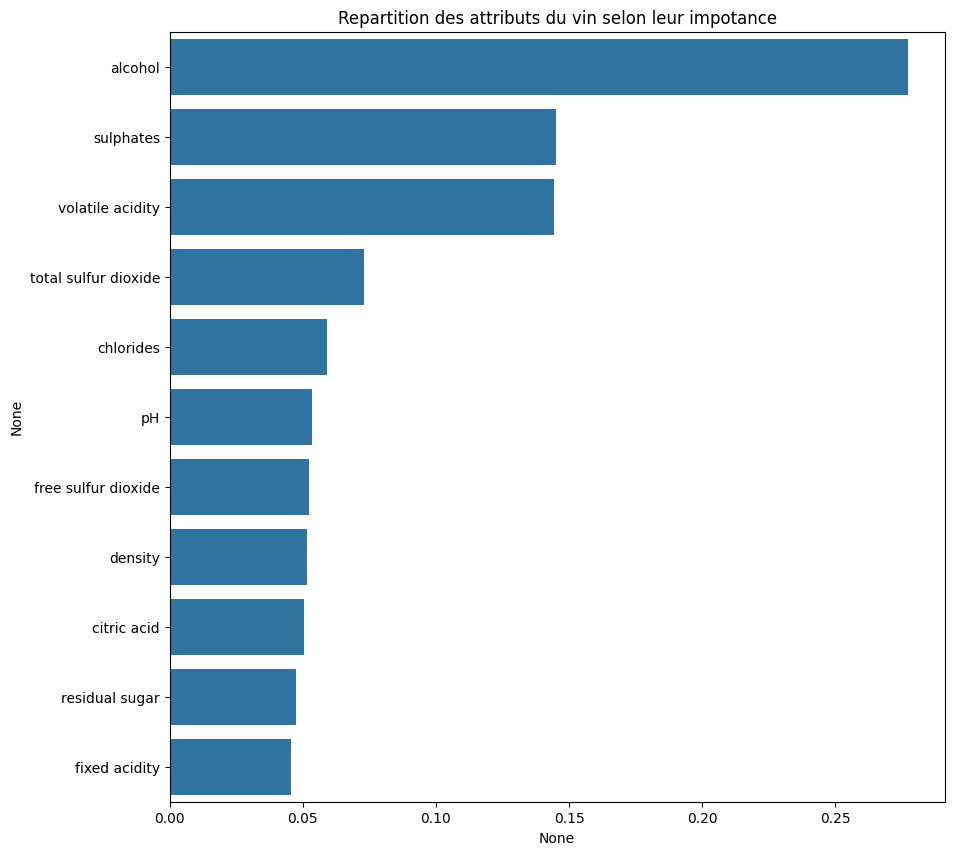

In [53]:
plt.figure(figsize = (10, 10))
sns.barplot(x=variables_importantes, y= var_index)
plt.title("Repartition des attributs du vin selon leur impotance")
plt.show()

## Enregistrement du modèle

In [54]:
import joblib
joblib.dump(model, "detector_wine_quality")

['detector_wine_quality']